# Grain Facet project:

## Analyze runs in the tau (slip interval) vs. w (weathering rate) series

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read in data from 121 model runs that have already been compiled into a .csv file. Read into arrays for the slip-interval parameter, the weathering-rate parameter, and the resulting facet slope angle.

In [2]:
filename = 'slope_erorate_vw_series20190517.csv'

In [3]:
# Count number of lines in file
num_lines = len(open(filename).readlines(  ))
print('The file has ' + str(num_lines) + ' lines.')

# Create data arrays
slip_interval = np.zeros(num_lines - 1)  # skip 1 header line
weath_param = np.zeros(num_lines - 1)
facet_angle = np.zeros(num_lines - 1)
ero_rate = np.zeros(num_lines - 1)
frac_soil = np.zeros(num_lines - 1)

# Read data
with open(filename, 'r') as csvfile:
    myreader = csv.reader(csvfile)
    i = 0
    for row in myreader:
        print(', '.join(row))
        if i >= 1:
            slip_interval[i-1] = row[1]
            weath_param[i-1] = row[2]
            facet_angle[i-1] = row[3]
            ero_rate[i-1] = row[6]
            frac_soil[i-1] = row[7]
        i += 1

The file has 257 lines.
Run name, Slip interval, Weathering rate parameter, Slope angle, Slope gradient, Intercept, Average erosion rateFractional soil cover
tau40w-48, 10000.0, 1.5848931924611107e-05, 50.8257947296, 1.22724878788, 1.33495618306, 1.96257060177e-05, 0.26755852842809363
tau40w-46, 10000.0, 2.511886431509577e-05, 46.7343097218, 1.06244817307, 0.0691333982473, 2.80707889797e-05, 0.23293172690763053
tau26w-30, 398.1071705534973, 0.001, 42.8484836728, 0.927583197822, 0.88023369036, 0.000812968192091, 0.3813953488372093
tau32w-30, 1584.893192461114, 0.001, 30.8418731839, 0.597110602161, -0.203505355404, 0.000312752784842, 0.7904191616766467
tau28w-44, 630.9573444801937, 3.9810717055349695e-05, 58.5858411295, 1.63735299565, 0.508276533593, 5.599422234e-05, 0.13314447592067988
tau42w-22, 15848.93192461114, 0.00630957344480193, 26.541646699, 0.499489497736, 1.98831548199, 3.09205943141e-05, 0.950920245398773
tau28w-28, 630.9573444801937, 0.0015848931924611126, 32.2788021367, 0.6

Convert the data into a pandas DataFrame. This allows us to sort the data set according to $\tau$ and $w$.

In [4]:
import pandas as pd

In [5]:
data = {'tau_s' : slip_interval, 'w': weath_param, 'angle': facet_angle, 'erorate': ero_rate,
        'fracsoil' : frac_soil}
df = pd.DataFrame(data)
df = df.sort_values(by=['w', 'tau_s'])
df

,tau_s,w,angle,erorate,fracsoil
175,100.000000,0.000010,59.549870,0.000013,0.000000
170,158.489319,0.000010,59.515503,0.000013,0.016722
140,251.188643,0.000010,59.513431,0.000012,0.029703
142,398.107171,0.000010,59.471927,0.000013,0.031646
127,630.957344,0.000010,59.325438,0.000013,0.031746
139,1000.000000,0.000010,59.225806,0.000013,0.077612
141,1584.893192,0.000010,59.182747,0.000015,0.120370
176,2511.886432,0.000010,58.512182,0.000018,0.084986
171,3981.071706,0.000010,57.808119,0.000017,0.086351
62,6309.573445,0.000010,56.017080,0.000017,0.183673


Calculate the dimensionless slip rate. The slip rate is defined as:

$V = \sqrt{3} \delta / \tau_s$

The dimensionless slip rate is:

$V^* = V / \delta d$

We also want to calculate the $w-d$ ratio, which we'll also call $w^*$.

For purposes of these calculations, we happen to know that the runs were performed with $d = 10^{-4}$ yr$^{-1}$.

In [6]:
d = 1.0e-4
delta = 0.5
df['V'] = 3.0**0.5 * delta / df['tau_s']
df['Vstar'] = df['V'] / (delta * d)
df['wstar'] = df['w'] / d
df

,tau_s,w,angle,erorate,fracsoil,V,Vstar,wstar
175,100.000000,0.000010,59.549870,0.000013,0.000000,0.008660,173.205081,0.100000
170,158.489319,0.000010,59.515503,0.000013,0.016722,0.005464,109.285018,0.100000
140,251.188643,0.000010,59.513431,0.000012,0.029703,0.003448,68.954185,0.100000
142,398.107171,0.000010,59.471927,0.000013,0.031646,0.002175,43.507149,0.100000
127,630.957344,0.000010,59.325438,0.000013,0.031746,0.001373,27.451155,0.100000
139,1000.000000,0.000010,59.225806,0.000013,0.077612,0.000866,17.320508,0.100000
141,1584.893192,0.000010,59.182747,0.000015,0.120370,0.000546,10.928502,0.100000
176,2511.886432,0.000010,58.512182,0.000018,0.084986,0.000345,6.895418,0.100000
171,3981.071706,0.000010,57.808119,0.000017,0.086351,0.000218,4.350715,0.100000
62,6309.573445,0.000010,56.017080,0.000017,0.183673,0.000137,2.745116,0.100000


As a test, let's look at the relationship between slope and erosion rate. From a previous analysis, the relation between erosion rate and slope angle is:

$E_v = V \left( \sin\alpha - \frac{\cos\alpha\sin\theta}{\cos\theta} \right)$.

So one thing we can do is plot predicted versus calculated $E_v$:

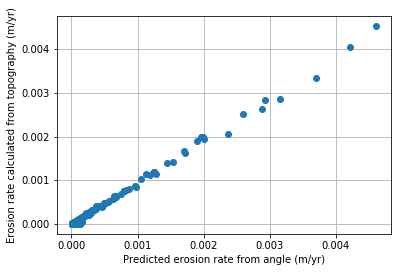

In [7]:
alphar = np.radians(60.0)
Ev_pred = df['V'] * (np.sin(alphar) - (np.cos(alphar) * np.tan(np.radians(df['angle']))))
plt.plot(Ev_pred, df['erorate'], 'o')
plt.xlabel('Predicted erosion rate from angle (m/yr)')
plt.ylabel('Erosion rate calculated from topography (m/yr)')
plt.grid(True)

We expect some noise, do to the stochastic nature of the simulation and the uncertainty in the estimation of slope angle, so the above looks reasonable. A similar check is to plot the angle predicted from erosion rate (inverting the above equation) versus the angle measured. Again, we expect some noise, but the relationship ought to be close to 1:1. Here's what it looks like:

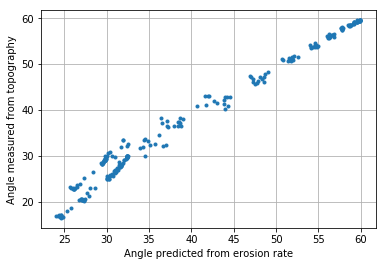

In [8]:
EvV = df['erorate'] / df['V']
theta_pred = np.degrees(np.arctan((1/np.cos(alphar))*(np.sin(alphar) - EvV)))
plt.plot(theta_pred, df['angle'], '.')
plt.xlabel('Angle predicted from erosion rate')
plt.ylabel('Angle measured from topography')
plt.grid(True)

## Relation between erosion rate, angle, and weathering parameter

We can now look at how the weathering-rate parameter influences erosion rate. Start with some dimensional analysis. Our variables are:

- vertical erosion rate, $E_v$ (L/T)
- slip interval, $\tau_s$ (T)
- weathering rate parameter, $w$ (1/T)
- disturbance rate parameter, $d$ (1/T)
- cell width, $\delta$ (L)
- facet angle, $\theta$ (-)

From these, we can construct dimensionless parameters that are inter-related:

$\frac{E_v\tau_s}{\delta} = f\left( \theta, \frac{w}{d} \right)$.

This suggests that a logical approach to plotting is to plot dimensionless erosion rate (basically erosion rate relative to slip rate) as a function of angle, for each value of $w$.

An alternative is:

$\frac{E_v}{\delta d} = f\left( \theta, \frac{V}{\delta d}, \frac{w}{d} \right)$


In [9]:
Eprime1 = df['erorate'] * df['tau_s'] / delta
Eprime2 = df['erorate'] / (delta * d)

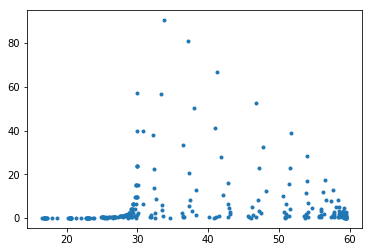

In [10]:
plt.plot(df['angle'], Eprime2, '.')

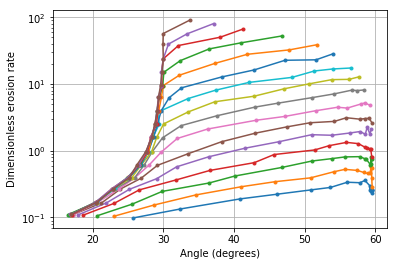

In [11]:
facet_angle = df['angle'].values.reshape((16, 16))
nd_ero_rate = Eprime2.values.reshape((16, 16))
for i in range(16):
    plt.semilogy(facet_angle[i], nd_ero_rate[i], '.-')
plt.xlabel('Angle (degrees)')
plt.ylabel('Dimensionless erosion rate')
plt.grid(True)

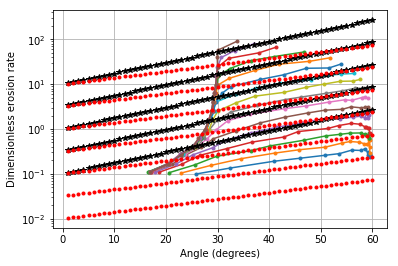

In [12]:
for i in range(16):
    plt.semilogy(facet_angle[i], nd_ero_rate[i], '.-')
plt.xlabel('Angle (degrees)')
plt.ylabel('Dimensionless erosion rate')
plt.grid(True)
ang = np.arange(1, 61)
plt.plot(ang, 0.1 * np.exp(np.pi * np.radians(ang)), 'k*')
plt.plot(ang, 0.32 * np.exp(np.pi * np.radians(ang)), 'k*')
plt.plot(ang, np.exp(np.pi * np.radians(ang)), 'k*')
plt.plot(ang, 3.2 * np.exp(np.pi * np.radians(ang)), 'k*')
plt.plot(ang, 10.0 * np.exp(np.pi * np.radians(ang)), 'k*')

b = 0.05
plt.plot(ang, 0.01 * np.exp(ang / 30), 'r.')
plt.plot(ang, 0.032 * np.exp(ang / 30), 'r.')
plt.plot(ang, 0.1 * np.exp(ang / 30), 'r.')
plt.plot(ang, 0.32 * np.exp(ang / 30), 'r.')
plt.plot(ang, np.exp(ang / 30), 'r.')
plt.plot(ang, 3.2 * np.exp(ang / 30), 'r.')
plt.plot(ang, 10.0 * np.exp(ang / 30), 'r.')

5[0.04691479 1.9250981 ]
6[0.05150786 2.36673514]
6[0.06892815 2.55827506]
7[0.07882279 2.90300133]
6[0.15626707 2.62523512]
7[0.23519037 2.6617294 ]
6[0.42226084 2.48914055]
6[0.58742612 2.65691841]
7[0.63319922 3.1217878 ]
6[1.40993706 2.64989715]
7[1.60338052 3.05178363]
6[2.73422439 2.97431399]
5[3.2985216  3.43791481]
3[4.64600759 3.66686755]
3[1.59357986 6.06480068]


TypeError: Improper input: N=2 must not exceed M=1

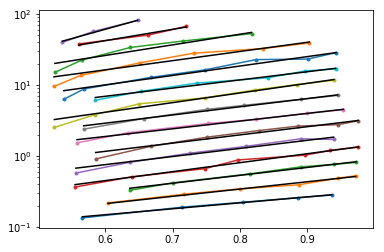

In [13]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * np.exp(b * x)

for i in range(16):
    valid = np.logical_and(facet_angle[i] > 30.0, facet_angle[i] < 56.0)
    if len(valid) > 2:
        x = np.radians(facet_angle[i][valid])
        y = nd_ero_rate[i][valid]
        popt, pcov = curve_fit(func, x, y)
        print(str(len(x)) + str(popt))
        plt.semilogy(x, nd_ero_rate[i][valid], '.-')
        plt.plot(x, func(x, *popt), 'k')
plt.xlabel('Angle (degrees)')
plt.ylabel('Dimensionless erosion rate')
plt.grid(True)

### Playing with erosion rate vs. weathering parameter



In [ ]:
a = 1.8
delta = 0.5
max_wx_rate = 2.0 * a * delta * df['w']
En = df['erorate'] / np.cos(np.radians(df['angle']))
df['ero_w_ratio'] = En / max_wx_rate
df

In [ ]:
fracsoil = df['fracsoil'].values.reshape(16, 16)
print(len(facet_angle[0]))
print(len(wstar[0]))
psyms = ['ko-', 'k^-', 'k.-', 'k+-', 'kx-', 'k*-']
fig = plt.figure()
ax = plt.gca()
sc = ax.scatter(facet_angle, nd_ero_rate, c=fracsoil, zorder=2)
ax.set_yscale('log')
for i in range(0, 16, 1):
    ax.plot(facet_angle[i], nd_ero_rate[i], 'k--', zorder=1, linewidth=0.5)
plt.xlabel('Slope angle (degrees)', fontsize=12)
plt.ylabel('Dimensionless erosion rate', fontsize=12)
plt.grid(True)
fig.colorbar(sc, label='fractional regolith cover')
plt.savefig('ero_rate_vs_slope_angle.pdf')

In [ ]:
ero_w_ratio = df['ero_w_ratio'].values.reshape(16, 16)
print(len(facet_angle[0]))
print(len(wstar[0]))
psyms = ['ko-', 'k^-', 'k.-', 'k+-', 'kx-', 'k*-']
fig = plt.figure()
ax = plt.gca()
sc = ax.scatter(facet_angle, nd_ero_rate, c=ero_w_ratio, zorder=2)
ax.set_yscale('log')
for i in range(0, 16, 1):
    ax.plot(facet_angle[i], nd_ero_rate[i], 'k--', zorder=1, linewidth=0.5)
plt.xlabel('Slope angle (degrees)', fontsize=12)
plt.ylabel('Dimensionless erosion rate', fontsize=12)
plt.grid(True)
fig.colorbar(sc, label=r'$E_v / 2a\delta w$')
#plt.savefig('ero_rate_vs_slope_angle_by_eroratio.pdf')

In [ ]:
plt.scatter(1.0 - fracsoil, ero_w_ratio)

## Simple mathematical model for erosion rate

Here we craft a simple analytical model for erosion rate as a function of slope angle. Our model recognizes two modes: weathering-limited and transport-limited. The weathering-limited model starts with the concept that:

$\frac{E}{d\delta} = w\tau \exp \left( \pi \theta \right)$,

with $\theta$ in radians. Plotting this relationship, here's what it looks like for a series of values of $\theta$:

In [ ]:
theta = np.arange(1, 60)
thetar = np.radians(theta)
wvals = df['w'].values[::16]
ff = 0.15
for i in range(len(wvals)):
    Eprime = ff * (wvals[i] / d) * np.exp(np.pi * thetar)
    plt.semilogy(theta, Eprime, 'k')
    plt.semilogy(facet_angle[i], nd_ero_rate[i], '.')

Try plotting a more-easily-seen subset of the above data, with plot symbols that vary by $w$.

In [ ]:
wstar = df['wstar'].values.reshape(16, 16)
print(len(facet_angle[0]))
print(len(wstar[0]))
psyms = ['ko-', 'k^-', 'k.-', 'k+-', 'kx-', 'k*-']
fig = plt.figure()
ax = plt.gca()
sc = ax.scatter(facet_angle, nd_ero_rate, c=wstar, zorder=2)
ax.set_yscale('log')
for i in range(0, 16, 1):
    ax.plot(facet_angle[i], nd_ero_rate[i], 'k--', zorder=1, linewidth=0.5)
plt.xlabel('Slope angle (degrees)', fontsize=12)
plt.ylabel('Dimensionless erosion rate', fontsize=12)
plt.grid(True)
fig.colorbar(sc, label='w*')
#plt.savefig('ero_rate_vs_slope_angle_color_wstar.pdf')

# TODO: THE VALUE 0.15 IS TOTALLY MADE UP. WHY THAT VALUE? ALSO, TRY PLOTTING A CURVED TRANSPORT FUNCTION.

In [ ]:
S = np.tan(thetar)
Sc = np.tan(np.radians(10))
plt.plot(theta, S * (1 + (S/Sc)**2 + (S/Sc)**4) + (S/Sc)**6 + (S/Sc)**8  + (S/Sc)**10)

In [ ]:
df

In [ ]:
df['w/d'] = df['w'].values / d
wd = df['w/d']

In [ ]:
import plotnine as p9

In [ ]:
(p9.ggplot(df, p9.aes('angle', 'erorate'))
 + p9.geom_point(p9.aes(color='fracsoil'))
 + p9.scale_y_log10()
 + p9.geom_line(p9.aes(), subset())
 + p9.scale_color_gradient2(low='blue', mid='gray', high='red', midpoint=0.5)
# + p9.scale_colour_gradient(trans = "log")
)